In [1]:
# This is the code to reorganize the total trade spend csv provided by kenvue, it is the same process as total sales
import pandas as pd

In [2]:
# Loading the CSV data. I declared row 0 as header.  The data begins in row 1.
df = pd.read_csv('~/Desktop/kenvue_data/Total Trade Spend.csv', header=[0])

In [3]:
# Let's see what it looks like
df

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5
0,2021,1,5552,14264,1563,18716,5075
1,2021,2,18939,12329,8658,8069,11307
2,2021,3,11346,6351,4032,3128,6585
3,2021,4,4801,14715,13935,9324,6835
4,2021,5,17470,16092,13601,5460,11902
...,...,...,...,...,...,...,...
144,2023,41,2918,2361,15546,7217,9652
145,2023,42,10743,15952,3993,6707,17320
146,2023,43,7823,19451,12462,1217,4638
147,2023,46,19575,14362,12145,16973,575


In [4]:
# This Data is already fairly clean, but I to get the Need states into a column, This seems like this can be done by stacking the need states
# unsure why only 5 need states in this data set but dosnt change process
df.columns

Index(['Fiscal Year', 'Fiscal Week', 'Need State 1', 'Need State 2',
       'Need State 3', 'Need State 4', 'Need State 5'],
      dtype='object')

In [5]:
#Need to set the index to be the Fiscal year/Fiscal week column since only the needstates need to be stacked
df2 = df.set_index([('Fiscal Year'),('Fiscal Week')])

In [6]:
df2

Need State 1  Need State 2  Need State 3  \
Fiscal Year Fiscal Week                                             
2021        1                    5552         14264          1563   
            2                   18939         12329          8658   
            3                   11346          6351          4032   
            4                    4801         14715         13935   
            5                   17470         16092         13601   
...                               ...           ...           ...   
2023        41                   2918          2361         15546   
            42                  10743         15952          3993   
            43                   7823         19451         12462   
            46                  19575         14362         12145   
            50                  15705          4216          6644   

                         Need State 4  Need State 5  
Fiscal Year Fiscal Week                              
2021        1                   18716          5075  
            2                    8069         11307  
            3                    3128          6585  
            4                    9324          6835  
            5                    5460         11902  
...                               ...           ...  
2023        41                   7217          9652  
            42                   6707         17320  
            43                   1217          4638  
            46                  16973           575  
            50                   2088           538  

[149 rows x 5 columns]

In [7]:
#Now i stack the need states
df2 = df2.stack(0)

In [8]:
df2

Fiscal Year  Fiscal Week              
2021         1            Need State 1     5552
                          Need State 2    14264
                          Need State 3     1563
                          Need State 4    18716
                          Need State 5     5075
                                          ...  
2023         50           Need State 1    15705
                          Need State 2     4216
                          Need State 3     6644
                          Need State 4     2088
                          Need State 5      538
Length: 745, dtype: int64

In [9]:
# Now I will reset the index so it will go back to numbers as row index
df2 = df2.reset_index()

In [10]:
#This looks good
df2

,Fiscal Year,Fiscal Week,level_2,0
0,2021,1,Need State 1,5552
1,2021,1,Need State 2,14264
2,2021,1,Need State 3,1563
3,2021,1,Need State 4,18716
4,2021,1,Need State 5,5075
...,...,...,...,...
740,2023,50,Need State 1,15705
741,2023,50,Need State 2,4216
742,2023,50,Need State 3,6644
743,2023,50,Need State 4,2088


In [11]:
# Let's rename the columns to match the rest of the data we cleaned
df2 = df2.rename_axis(None, axis=1)
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "week", df2.columns[2]: "Need States", df2.columns[3]: "Total Trade Spend"})

In [12]:

df2

,year,week,Need States,Total Trade Spend
0,2021,1,Need State 1,5552
1,2021,1,Need State 2,14264
2,2021,1,Need State 3,1563
3,2021,1,Need State 4,18716
4,2021,1,Need State 5,5075
...,...,...,...,...
740,2023,50,Need State 1,15705
741,2023,50,Need State 2,4216
742,2023,50,Need State 3,6644
743,2023,50,Need State 4,2088


In [13]:
# Lastly, use the datetime function to add a date column that resembles excel better
df2['date'] = pd.to_datetime(df2["year"].astype(str) + "-" + df2["week"].astype(str) + "-1", format='%Y-%U-%w')

In [14]:
df2

,year,week,Need States,Total Trade Spend,date
0,2021,1,Need State 1,5552,2021-01-04
1,2021,1,Need State 2,14264,2021-01-04
2,2021,1,Need State 3,1563,2021-01-04
3,2021,1,Need State 4,18716,2021-01-04
4,2021,1,Need State 5,5075,2021-01-04
...,...,...,...,...,...
740,2023,50,Need State 1,15705,2023-12-11
741,2023,50,Need State 2,4216,2023-12-11
742,2023,50,Need State 3,6644,2023-12-11
743,2023,50,Need State 4,2088,2023-12-11


In [15]:
import seaborn as sns

<Axes: xlabel='date', ylabel='Total Trade Spend'>

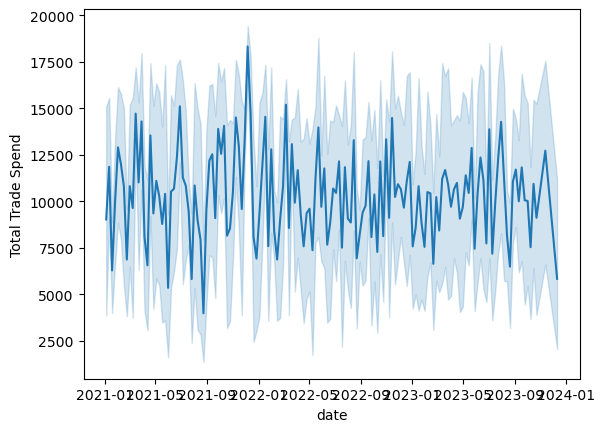

In [16]:
sns.lineplot(data = df2, x=df2.date, y='Total Trade Spend')

<Axes: xlabel='week', ylabel='Total Trade Spend'>

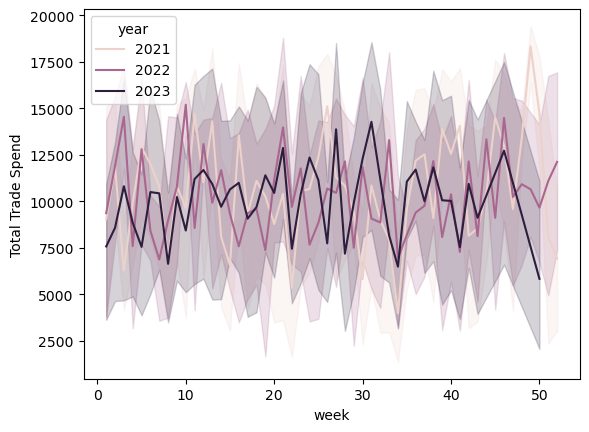

In [17]:
sns.lineplot(data = df2, x='week', y='Total Trade Spend', hue='year')

In [22]:
#Everything looks good for this data set time to export to a new csv

df2.to_csv('~/Desktop/Total_Trade_Spend_Cleaned.csv')